# Analisando o engajamento do Instagram

### O que queremos responder?
- Qual tipo de conteúdo **mais engaja** no Instagram da minha empresa?
<br><br>
- Base de dados do Instagram **desde que o usuário começou a postar na marca até o dia 27/março**
<br><br>
- Alguns direcionamentos:
    - Poder ignorar a coluna visualizações, queremos entender apenas curtidas, comentários e interações
    - Tags vazias é que realmente não possuem tag (favor tratar como vazio)

### Importar e visualizar a base de dados

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importar a base em excel

from src.config import DADOS_ORIGINAIS

df = pd.read_excel(DADOS_ORIGINAIS)


In [3]:
# Visualizando as 5 primeiras linhas
df.head()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,82878.0,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437


In [4]:
# Visualizando o Tamando da base de dados (linhas, Colunas)
df.shape

(52, 10)

In [5]:
# Verificando informações sobre a base de dados
df.info()

# Verifica que a coluna Carrossel possui apenas 8 valores não nulos por isso é importante tratar os dados dessa coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Tipo           52 non-null     object        
 1   Data           52 non-null     datetime64[ns]
 2   Curtidas       52 non-null     int64         
 3   Comentários    52 non-null     int64         
 4   Visualizações  15 non-null     float64       
 5   Tags           44 non-null     object        
 6   Pessoas        52 non-null     object        
 7   Campanhas      52 non-null     object        
 8   Carrossel      8 non-null      object        
 9   Interacoes     52 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 4.2+ KB


### Como um dos direcionamentos é para não considerar a coluna visualizações, vou retirar essa coluna da base

**O .drop() permite apagar uma coluna ou linha da base:** <br>
base<font color="blue">**.drop(**</font>nome_coluna,axis=1<font color="blue">**)**</font>
- O axis = 1 se refere a coluna, enquanto axis = 0 se refere a linha
- Devemos passar o nome da coluna que queremos apagar da base
- Em caso de mais de 1 coluna, passamos a lista entre colchetes

In [6]:
# Apagando a coluna "Visualizações"
# é preciso atribuir a (df = ...) para realmete ocorrer a modificação no dataFrame 
df = df.drop("Visualizações",axis=1)

In [7]:
# Visualizando novamente as 5 primeiras linhas
df.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [8]:
# Visualizando as 5 últimas linhas
df.tail()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
47,IGTV,2022-03-12,5489,77,Dicas de como usar/Novos Produtos,S,N,NaN,5566
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,NaN,29563
49,Foto,2022-03-22,9087,106,NaN,S,S,NaN,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,NaN,16737
51,IGTV,2022-03-27,4934,65,Dicas de como usar/Produtos,S,N,NaN,4999


In [9]:
# Tamanho da base
df.shape

(52, 9)

In [10]:
# Se a base for pequena, o display mostra a base completa

In [11]:
# Verificando as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tipo         52 non-null     object        
 1   Data         52 non-null     datetime64[ns]
 2   Curtidas     52 non-null     int64         
 3   Comentários  52 non-null     int64         
 4   Tags         44 non-null     object        
 5   Pessoas      52 non-null     object        
 6   Campanhas    52 non-null     object        
 7   Carrossel    8 non-null      object        
 8   Interacoes   52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


### Carrossel possui apenas 8 valores não nulos

OBS: **Carrossel** no Instagram é um formato de post que permite publicar até 10 imagens ou vídeos em uma única publicação. O conteúdo pode ser organizado de acordo com a preferência do usuário

- Vamos entender os valores de carrossel

In [12]:
# Contando os valores que aparecem na coluna Carrossel
df.Carrossel.value_counts()

Carrossel
S    8
Name: count, dtype: int64

- Observa-se que na coluna **Carrossel** possui 8 postatagem desse tipo.
- Na verdade, os 44 valores nulos são de postagens que não são carrossel. Sendo assim o nulo deveria ser "N" padrão que foi usado nessa base de dados

### Tratando os valores nulos da coluna Carrossel

In [13]:
# Filtrando os valores em que carrossel é nulo
df.loc[df["Carrossel"].isnull().sum()]

Tipo                                        IGTV
Data                         2022-03-07 00:00:00
Curtidas                                    5918
Comentários                                  116
Tags           Dicas de como usar/Novos Produtos
Pessoas                                        S
Campanhas                                      N
Carrossel                                    NaN
Interacoes                                  6034
Name: 44, dtype: object

In [14]:
 # Filtrando os valores em que carrossel é nulo e visualizando os cinco primeiros 
df.loc[df.Carrossel.isnull()].head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [15]:
# Filtrando os valores em que carrossel NÃO é nulo
df.loc[df.Carrossel.notnull()].head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
5,Foto,2021-09-17,5359,62,Novos Produtos,N,S,S,5421
8,Foto,2021-09-27,6355,89,Produtos,S,N,S,6444
12,Foto,2021-10-21,6166,55,Novos Produtos,S,S,S,6221
21,Foto,2021-12-23,8328,93,Produtos,S,N,S,8421
25,Foto,2022-01-02,12193,138,Novos Produtos,S,N,S,12331


In [16]:
# Buscando valores que NÃO são nulos dento da base de dados
df.notnull().sum()

Tipo           52
Data           52
Curtidas       52
Comentários    52
Tags           44
Pessoas        52
Campanhas      52
Carrossel       8
Interacoes     52
dtype: int64

In [17]:
# Selecionando valores que são nulos apenas da coluna Carrossel
df.loc[df.Carrossel.isnull(), "Carrossel"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
6     NaN
7     NaN
9     NaN
10    NaN
11    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
22    NaN
23    NaN
24    NaN
27    NaN
29    NaN
30    NaN
31    NaN
32    NaN
33    NaN
34    NaN
35    NaN
36    NaN
37    NaN
38    NaN
39    NaN
41    NaN
42    NaN
43    NaN
44    NaN
45    NaN
46    NaN
47    NaN
48    NaN
49    NaN
50    NaN
51    NaN
Name: Carrossel, dtype: object

#### Tratando os valores nulos da coluna Carrossel

- Com os dados nulos da coluna **Carrossel**, vou atribuir a string "N" para marcar as postagem que NÂO foram feitas com o tipo Carrossel 

In [18]:
# Agora vamos atribuir o valor N para essa coluna
df.loc[df.Carrossel.isnull(), "Carrossel"] = "N"


**Verificando novamente os valores de Carrossel:**

In [19]:
# Verificando novamente os valores dessa coluna
df.head()

# Verifica que agora no lugar de NaN (Not a Number) está a string N

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437


In [20]:
 # Filtrando os valores em que carrossel é nulo
df.loc[df.Carrossel.isnull()].head()
# Verifica que não existem mais valores Nulos 

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes


In [21]:
# Verificando as informações da base de dados após o tratamento dos valores nulas da coluna Carrossel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tipo         52 non-null     object        
 1   Data         52 non-null     datetime64[ns]
 2   Curtidas     52 non-null     int64         
 3   Comentários  52 non-null     int64         
 4   Tags         44 non-null     object        
 5   Pessoas      52 non-null     object        
 6   Campanhas    52 non-null     object        
 7   Carrossel    52 non-null     object        
 8   Interacoes   52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


In [22]:
# Verificando novamente após o tratamento de dados os valores da coluna Carrossel
df.Carrossel.value_counts()

Carrossel
N    44
S     8
Name: count, dtype: int64

#### Tratando os valores nulos da coluna Carrossel

- Agora temos na coluna **Carrossel**:
  - 44 postagens marcadas como N 
  - 8 postagens marcadas como S 

### Mostrando as informações estatísticas

In [23]:
# Descrição estatística da base
df.describe().round(2)

,Data,Curtidas,Comentários,Interacoes
count,52,52.00,52.00,52.00
mean,2021-12-23 04:36:55.384615424,12262.73,189.50,12452.23
min,2021-09-11 00:00:00,2807.00,9.00,2816.00
25%,2021-10-23 06:00:00,5492.00,69.50,5562.50
50%,2022-01-05 00:00:00,9603.00,128.00,9773.50
75%,2022-02-15 12:00:00,17621.75,265.25,17920.75
max,2022-03-27 00:00:00,37351.00,852.00,37853.00
std,NaN,8165.88,170.69,8299.39


### Visualizando essas informações de maneira gráfica

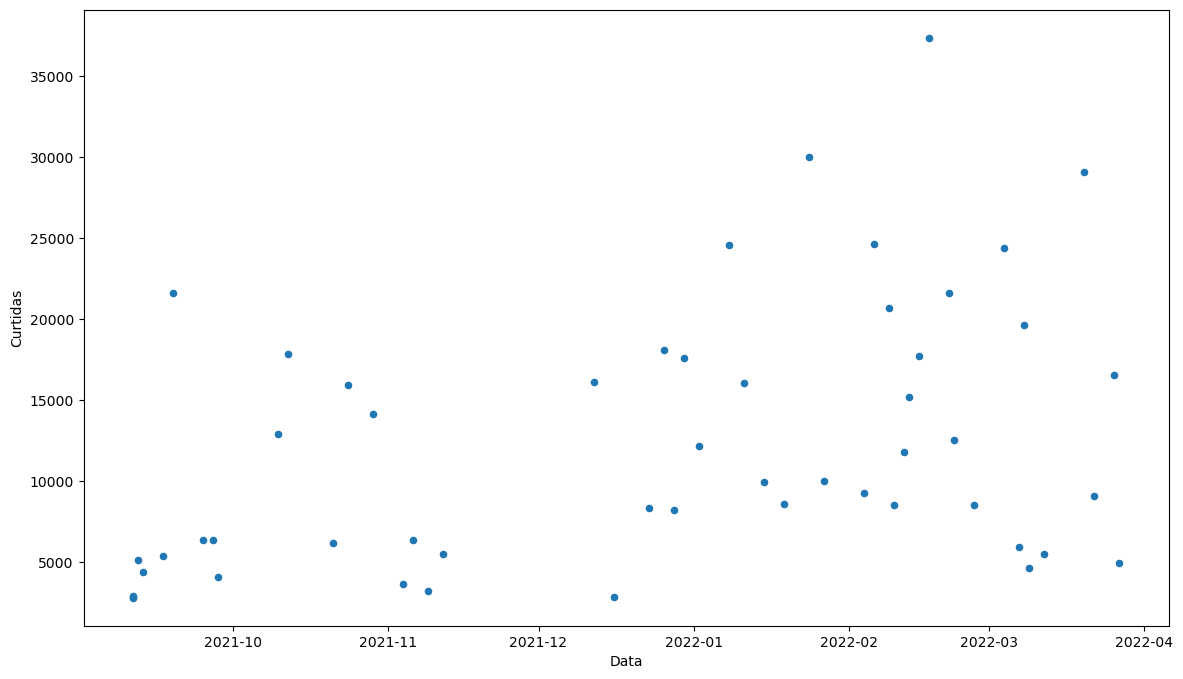

In [24]:
# Um gráfico de dispersão ajudaria a entender melhor curtidas e comentários
# Criando um gráfico de dispersão para visualizar a quantidade de curtidas com base nas datas de publicações
df.plot(kind="scatter",x="Data",y="Curtidas",figsize=(14,8));

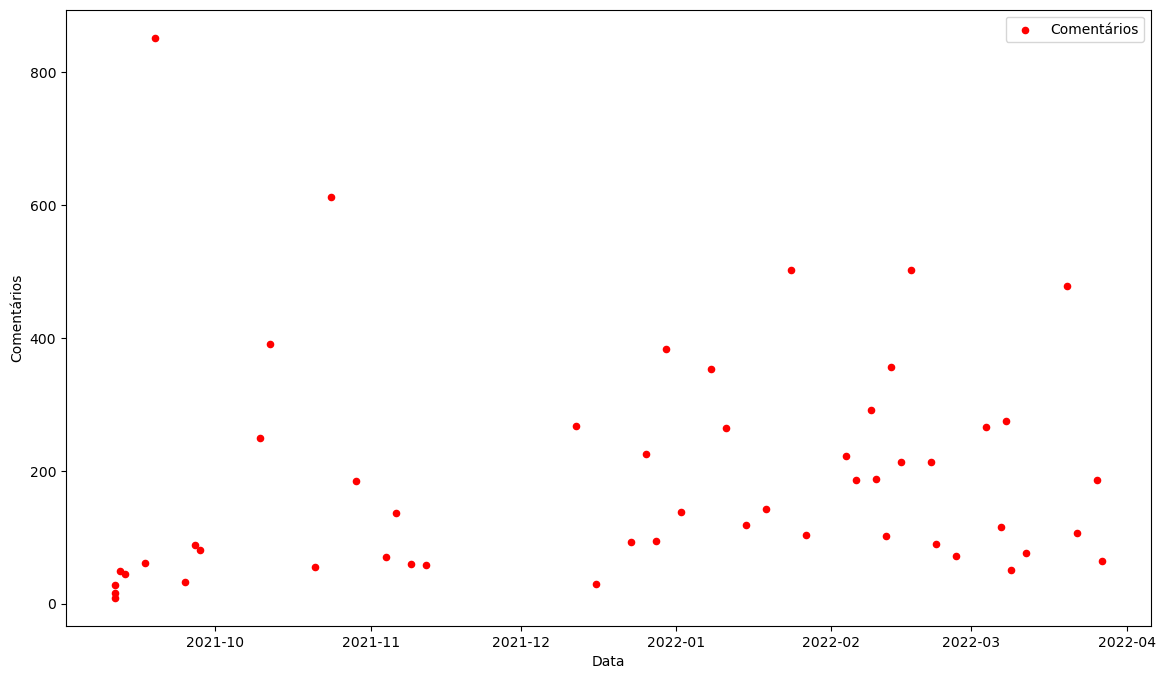

In [25]:
# Criando um gráfico de dispersão para visualizar a quantidade de comentários com base nas datas de publicações
df.plot(kind="scatter",x="Data",y="Comentários",color="red",label="Comentários",figsize=(14,8));

- O gráfico e as informações estatítiscas não estão dizendo muita coisa pois existe uma grande dispersão entre curtidas e comentários
- É necessáio verificar se existe um padrão usando as outras colunas de informações

### A primeira coisa que pode-se fazer é pegar os 5 primeiros registros com mais e menos curtidas 

- Observar se existe algum padrão relacionado às publicações que tiveram mais e menos curtidas.

In [26]:
# Ordenando os valores mostra as 5 publicações com mais curtidas 
df.sort_values(by="Curtidas",ascending=False).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939


In [27]:
# Selecionando os 5 últimos valores ( 5 publicações com menos curtidas)
df.sort_values(by="Curtidas",ascending=False).tail()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816


In [28]:
# Ordenando os valores mostra as 10 publicações com mais curtidas
df.nlargest(10, "Curtidas")

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939
43,Foto,2022-03-04,24399,266,NaN,S,S,N,24665
40,Foto,2022-02-21,21621,213,Influenciadores,S,S,S,21834
6,Foto,2021-09-19,21597,852,Novos Produtos,S,S,N,22449
34,Foto,2022-02-09,20660,292,Influenciadores,S,S,N,20952
45,Reels,2022-03-08,19621,275,Trends,S,S,N,19896


In [29]:
# Selecionando os 10 últimos valores ( 10 publicações com menos curtidas)
df.nsmallest(10, "Curtidas")

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
15,Vídeo,2021-11-04,3646,71,Produtos,N,N,N,3717
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,N,4137
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437
46,Foto,2022-03-09,4613,50,Influenciadores,S,N,N,4663
51,IGTV,2022-03-27,4934,65,Dicas de como usar/Produtos,S,N,N,4999


- Podemos observar que no top 10 todas as postagens tinham pessoas e eram fotos de campanha
- Nas 5 piores postagens, não haviam pessoas e nem eram postagens de campanhas
<br><br>
- **Isso pode ser um indicador que pessoas e campanhas tem relação com as curtidas**

### Vou usar o <font color="blue">group by</font> para analizar os dados por diferentes tipos de agrupamentos com o objetivo de entender melhor os dados

In [30]:
# Para melhorar a visualização, vamos criar um padrão no formato dos valores
pd.options.display.float_format = '{:,.2f}'.format

In [31]:
# Agrupando por Tipo e Pessoas
df.groupby(["Tipo","Pessoas"])["Curtidas"].mean()

Tipo   Pessoas
Foto   N          3,863.50
       S         15,236.67
IGTV   S          6,833.40
Reels  N          5,934.50
       S         20,832.00
Vídeo  N          4,007.50
       S         16,409.50
Name: Curtidas, dtype: float64

In [32]:
df.groupby(["Tipo","Pessoas"])[["Curtidas",'Comentários']].mean()

Curtidas  Comentários
Tipo  Pessoas                       
Foto  N        3,863.50        29.50
      S       15,236.67       226.20
IGTV  S        6,833.40       133.60
Reels N        5,934.50        98.00
      S       20,832.00       342.00
Vídeo N        4,007.50        65.25
      S       16,409.50       370.00

In [33]:
# Incluindo a coluna de campanhas
df.groupby(["Tipo","Pessoas", "Campanhas"])[["Curtidas",'Comentários']].mean()

Curtidas  Comentários
Tipo  Pessoas Campanhas                       
Foto  N       N          2,869.00        20.50
              S          5,852.50        47.50
      S       N         10,815.29       159.93
              S         19,105.38       284.19
IGTV  S       N          6,833.40       133.60
Reels N       N          5,934.50        98.00
      S       N         12,894.00       249.00
              S         24,801.00       388.50
Vídeo N       N          4,007.50        65.25
      S       S         16,409.50       370.00

- O groupby já permite ver que publicações de campanha tem um grande engajamento e com foto de pessoas também

**Podemos então fazer os agrupamentos que acharmos melhor para entender os nossos dados**

In [34]:
# Somente para pessoas
df.groupby("Pessoas")[["Curtidas",'Comentários']].mean()

,Curtidas,Comentários
Pessoas,,
N,"4,256.67",52.83
S,"14,664.55",230.50


- **Postagens com pessoas engajam muito mais para essa marca, sendo 3 vezes maior de quando não tem pessoas**

In [35]:
# Somente para campanhas
df.groupby("Campanhas")[["Curtidas",'Comentários']].mean()

,Curtidas,Comentários
Campanhas,,
N,"7,928.33",123.17
S,"18,173.27",279.95


- **Quando é uma postagem de campanha, o engajamento também é melhor!**

In [36]:
# Carrossel (sem filtrar a base)
df.groupby("Carrossel")[["Curtidas",'Comentários']].mean()

,Curtidas,Comentários
Carrossel,,
N,"12,343.61",198.43
S,"11,817.88",140.38


In [37]:
# Podemos também filtrar a base
df[df.Tipo == "Foto"].groupby("Carrossel")[["Curtidas",'Comentários']].mean()

,Curtidas,Comentários
Carrossel,,
N,"13,776.36",208.57
S,"11,817.88",140.38


- **A média sem usar carrossel é melhor do que quando usamos, então não é algo que possa impactar tanto no resultado das mídias dessa empresa olhando inicialmente**
    - Nesse caso devemos filtrar apenas as fotos pois só temos carrossel em fotos. Sem esse filtro estaríamos comparando coisas erradas

**Colocando pessoas e campanhas juntos podemos ver como se dá essa diferença**

In [38]:
# Agregando por pessoas e campanhas
df.groupby(["Pessoas", "Campanhas"])[["Curtidas",'Comentários']].mean()

Curtidas  Comentários
Pessoas Campanhas                       
N       N          3,937.50        53.90
        S          5,852.50        47.50
S       N          9,923.75       157.80
        S         19,405.35       303.20

- **A média quando tem pessoas E é publicação de campanhas é de cerca de 19,4 mil curtidas, já quando é apenas pessoas (sem campanha passa para quase 10 mil e se não tiver pessoas chega no máximo a 5,9 mil mesmo em campanhas**
<br><br>
- **Nesse caso a gente já consegue mostrar para a empresa a importância de incluir pessoas usando os seus produtos, o que gera um aumento considerável no engajamento**

In [39]:
# Agregando por pessoas, campanhas e tipo
df.groupby(["Pessoas", "Campanhas", "Tipo"])[["Curtidas",'Comentários']].mean()

Curtidas  Comentários
Pessoas Campanhas Tipo                        
N       N         Foto   2,869.00        20.50
                  Reels  5,934.50        98.00
                  Vídeo  4,007.50        65.25
        S         Foto   5,852.50        47.50
S       N         Foto  10,815.29       159.93
                  IGTV   6,833.40       133.60
                  Reels 12,894.00       249.00
        S         Foto  19,105.38       284.19
                  Reels 24,801.00       388.50
                  Vídeo 16,409.50       370.00

- **Analisando novamente a questão do vídeo, ele não parece mais tão ruim assim. Quando feito em campanha e usando pessoas ele teve um resultado bom, inclusive próximo a foto**
- O que poderia ter levado a média baixa é que só temos vídeo ou COM pessoa e COM campanha ou sem nenhum dos dois. Não temos nenhum vídeo com apenas um dos dois (pessoa ou campanha)
- Já IGTV, mesmo tendo pessoa, não teve um resultado tão bom

#### Inclusive podemos entender o que havia gerado a média baixo no vídeo

In [40]:
# Vamos filtrar a base apenas onde o tipo é Vídeo
df[df.Tipo == "Vídeo"]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,N,4137
15,Vídeo,2021-11-04,3646,71,Produtos,N,N,N,3717
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
24,Vídeo,2021-12-30,17600,383,Trends,S,S,N,17983
37,Vídeo,2022-02-13,15219,357,Datas comemorativas,S,S,N,15576


- **Aqui percebemos que a loja tentou postar 4 vídeos mostrando seus produtos (sem nenhuma pessoa) e o resultado foi baixo. Quando o vídeo foi feito com pessoas aproveitando trends e datas comemorativas o resultado foi muito bom!**
- OBS: É fundamental utilizar os indicadores corretos para evitar conclusões equivocadas. Embora a média seja amplamente utilizada, ela pode ser fortemente influenciada por valores extremos, por exemplo, em um conjunto de dados onde a maioria dos valores é alta, mas há um ou dois valores muito baixos, a média será puxada para baixo, dando uma falsa impressão de que o desempenho geral é pior do que realmente é. 

## Conclusões
### 1 Postagens com Pessoas Engajam Mais
A análise inicial revelou que conteúdos visuais que incluem pessoas geram significativamente mais engajamento do que aqueles que não apresentam indivíduos. Essa tendência sugere que elementos humanos em postagens criam uma conexão emocional ou visual mais forte com o público.

### 2 Campanhas Aumentam o Engajamento
Durante períodos de campanha, as postagens demonstraram melhor desempenho em termos de engajamento. Esse padrão pode ser atribuído a um aumento na atenção do público devido a promoções, mensagens específicas ou maior investimento em divulgação.

### 3 Carrossel Não Foi Um Diferencial
Apesar de ser um formato popular, o carrossel não se destacou como um fator de impacto positivo no engajamento da marca nesta base de dados. Isso indica que outros elementos, como o conteúdo ou o público-alvo, têm maior relevância do que o tipo de postagem utilizado.